In [1]:
from src.LatentSpace import LatentSpace
import matplotlib.pyplot as plt

In [2]:
latent_space = LatentSpace(autoencoder_path='data/autoencoder_100k_1024f_mel_64/',
                        image_dir='data/Spotify/comp_pngs/',
                        tracks_feather_path='data/all_tracks.feather', latent_dims=64, output_size=(128, 64)
                        )

Found 10000 files for Generator set


In [3]:
latent_space.build()

Getting predictions from autoencoder...
[============================================================>] 312 / 312

1.02 minutes elapsed
Building tracks dataframe...
size of results 79872
Track dataframe built. 0.04 minutes elapsed
Building artist distributions...
Artist distributions built. 0.0 minutes elapsed
Building genre distributions...
Genre distributions built. 0.03 minutes elapsed
Latent Space Built.


In [ ]:
latent_space.save('data/latent_space_save_2/')
# latent_space.load('data/latent_space_save_2')

2022-08-16 17:48:07.432384: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


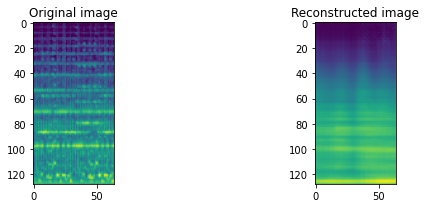

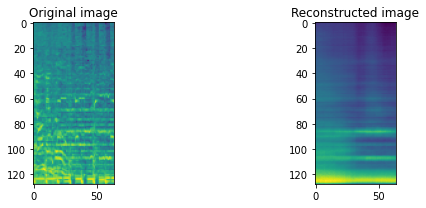

In [4]:
latent_space.plot_reconstruction(123)
latent_space.plot_reconstruction(122)

In [5]:
latent_space.tracks[latent_space.tracks.artist_name.str.contains('Michael Jackson')][['track_name','artist_name']]

,track_name,artist_name


In [11]:
seed = 1

display(latent_space.get_similar_tracks_by_index(seed, similarity_measure='cosine'))
display(latent_space.get_similar_artists_by_index(seed, similarity_measure='cosine'))
display(latent_space.get_similar_genres_by_index(seed, similarity_measure='cosine'))

,index,track_name,artist_name,track_uri,similarity
0,1,Hesıre Çave Te,Ihsan,spotify:track:0083MeKSfIbwmZcxkgtnDb,1.000000
1,1614,Maudie Shook,Danava,spotify:track:1F3TV99NUTyImCH08rxaXS,0.537955
2,4615,In der Zinskasern,Arik Brauer,spotify:track:3VXmvubtG1WEQMPdFVs7FA,0.532900
3,538,You're Gonna Ruin My Bad Reputation - Single V...,Ronnie McDowell,spotify:track:0QQ7B3FK3tDFGIZ4q1SNmG,0.527804
4,2674,Communion,Park Jiha,spotify:track:25De3d4O33wRgXvibHqZq0,0.516283
5,1776,Muinto Obrigado,Empire Bakuba,spotify:track:1NttEGWpsRpf5GSViuRPjY,0.510537
6,2571,Isithothobala,Soul Brothers,spotify:track:20HIiYOr65K48USggP1XEV,0.507005
7,870,Never More,Elf,spotify:track:0fD5jhjdUKRGrEdSrM4L0S,0.506430
8,1199,Afro Disco Beat,Africa 70,spotify:track:0tzvR9hZYdOBveJlgVz6Sy,0.504600
9,6220,It's My Life - Extended Mix; 2003 Remaster,Talk Talk,spotify:track:4nfSUYBf9XJxctw71Q17FZ,0.496461


,artist_name,similarity
0,Ihsan,1.000000
1,Danava,0.537955
2,Arik Brauer,0.532900
3,Ronnie McDowell,0.527804
4,Park Jiha,0.516283
5,Empire Bakuba,0.510537
6,Soul Brothers,0.507005
7,Elf,0.506430
8,Africa 70,0.504600
9,Talk Talk,0.496461


,genre,similarity
0,copla,0.568184
1,south african jazz,0.523053
2,country rock,0.496185
3,british country,0.490026
4,japanese jazz,0.484029
5,spanish prog,0.468934
6,tennessee experimental,0.459166
7,jam band,0.448536
8,social media pop,0.439334
9,greek guitar,0.439125


In [9]:

from pyarrow import feather
feather.read_feather('data/latent_space_save/artists.feather')

,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,...,latent_118,latent_119,latent_120,latent_121,latent_122,latent_123,latent_124,latent_125,latent_126,latent_127
artist_name,,,,,,,,,,,,,,,,,,,,,
!!!,-0.093092,0.273635,-0.359922,0.055348,-0.745507,-0.505306,0.388119,-0.094968,-0.160234,-0.064491,...,0.381984,0.060424,-0.529038,0.032527,0.187413,-0.242615,0.271059,0.230804,-0.013089,-0.462809
"""Weird Al"" Yankovic",0.341545,0.226364,-0.431828,-0.737806,1.033889,-0.306828,-0.000568,0.289829,-0.303757,-0.988815,...,0.109830,1.422638,0.837454,-0.444964,0.005258,0.681249,0.206787,0.998370,-0.230414,0.246917
#1 Dads,0.688585,-0.325864,-0.403679,-0.171223,0.147612,-0.539949,-0.416179,0.186194,-0.169721,-0.307046,...,-0.391773,0.616138,-0.160558,-0.380312,-0.460960,-0.029136,-0.212427,-0.029432,0.101394,-0.097789
#90s Update,-0.601853,0.760909,-0.229960,0.272182,0.333696,0.217613,0.348038,0.308312,-0.258377,0.954199,...,0.522312,0.627956,-0.578197,-0.442360,0.668299,-0.195950,-0.211039,0.324261,0.021071,0.713074
#M P L S,0.057898,-0.027478,-0.111383,-0.339202,0.490447,0.264413,0.091633,-0.237328,1.008620,-0.354147,...,-0.104905,0.050863,0.211532,0.627698,0.401851,0.380693,0.395675,0.904276,0.081716,0.238920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
트로트 가수들,-0.055655,0.135593,-0.545033,0.102071,0.173445,-0.433332,-0.236751,-0.162848,-0.394171,-0.139164,...,-0.565690,0.190121,0.009241,0.294647,0.272876,-0.043947,0.573592,0.344783,-0.505729,-0.661723
파니핑크,0.833407,-0.240428,-0.082421,0.621003,-0.030435,-0.594916,0.105251,-0.840222,0.375992,-0.822308,...,-0.351878,0.986316,0.467274,0.288985,-0.055140,-0.265303,-0.706402,0.142739,-0.607964,-0.386149
패티김,1.555425,0.157135,0.382276,0.166312,-1.162988,-1.223127,-0.342458,0.060412,0.549998,0.474238,...,-1.825267,0.410207,-1.016812,0.375702,-0.374664,0.365698,-0.586565,0.210377,-0.346670,0.012528
